In [ ]:
import tensorflow as tf
import regex as re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = open('./kanye.txt').read()
corpus = data.lower().split("\n")

cleaned_corpus = [re.sub('[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]', '', lyric) for lyric in corpus]
corpus = cleaned_corpus

print(corpus)
len(corpus)

9182

In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index)+1

print(f'Word index dictionart: {tokenizer.word_index}')
print(f'total Words: {total_words}')

In [ ]:
print(tokenizer.word_index['look'])

139


In [ ]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(len(token_list)):
    n_gram=token_list[:i+1]

    input_sequences.append(n_gram)

max_length = max([len(j) for j in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, padding='pre', maxlen=max_length))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(max_length)

235


In [ ]:
sentence = corpus[0].lower().split()
print(f'sample sentence: \n{sentence}')

token_list = []

for word in sentence: 
  token_list.append(tokenizer.word_index[word])

print(token_list)

sample sentence: 
['kanye', 'can', 'i', 'talk', 'to', 'you', 'for', 'a', 'minute', 'me', 'and', 'the', 'other', 'faculty', 'members', 'was', "wonderin'", 'could', 'you', 'do', 'a', 'lil', 'som', "somethin'", 'beautiful', "somethin'", 'that', 'the', 'kids', 'is', "gon'", 'love', 'when', 'they', 'hear', 'it', "tha's", 'gon', 'make', 'them', 'start', "jumpin'", 'up', 'and', 'down', 'and', "sharin'", 'candy', "an'", 'stuff', 'think', 'you', 'could', 'probably', 'do', "somethin'", 'for', 'the', 'kids', 'for', 'graduation', 'to', 'singintro']
[33, 52, 1, 187, 4, 3, 21, 6, 889, 9, 5, 2, 303, 2819, 1992, 36, 890, 100, 3, 53, 6, 585, 2820, 375, 632, 375, 11, 2, 244, 25, 121, 55, 42, 29, 234, 8, 2821, 376, 78, 101, 287, 2822, 16, 5, 41, 5, 1993, 985, 1113, 986, 156, 3, 100, 800, 53, 375, 21, 2, 244, 21, 1540, 4, 2823]


In [ ]:
elem_number = 6

print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  33  52   1 187   4   3]
decoded to text: ['kanye can i talk to

In [ ]:
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 21


In [ ]:
elem_number = 5

print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  33  52   1 187   4]
decoded to text: ['kanye can i talk to

In [ ]:
print(total_words)
print(max_length)
print(len(xs))

6190
235
62860


In [ ]:
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_length-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 234, 100)          619000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6190)              1863190   
                                                                 
Total params: 2,783,390
Trainable params: 2,783,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xs, ys, epochs=100)

Epoch 1/100
1965/1965 [==============================] - 60s 28ms/step - loss: 6.0767 - accuracy: 0.1060
Epoch 2/100
1965/1965 [==============================] - 55s 28ms/step - loss: 5.0892 - accuracy: 0.1785
Epoch 3/100
1965/1965 [==============================] - 56s 28ms/step - loss: 4.5033 - accuracy: 0.2144
Epoch 4/100
1965/1965 [==============================] - 55s 28ms/step - loss: 4.0744 - accuracy: 0.2461
Epoch 5/100
1965/1965 [==============================] - 56s 29ms/step - loss: 3.7768 - accuracy: 0.2723
Epoch 6/100
1965/1965 [==============================] - 55s 28ms/step - loss: 3.5878 - accuracy: 0.2934
Epoch 7/100
1965/1965 [==============================] - 55s 28ms/step - loss: 3.4479 - accuracy: 0.3091
Epoch 8/100
1965/1965 [==============================] - 55s 28ms/step - loss: 3.3610 - accuracy: 0.3212
Epoch 9/100
1965/1965 [==============================] - 55s 28ms/step - loss: 3.2877 - accuracy: 0.3307
Epoch 10/100
1965/1965 [==============================]

In [ ]:
# path='saved_models/model_lyrics_gen_eminem'
# model.save(path)

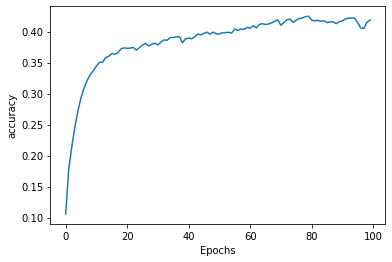

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [ ]:
# !zip -r /content/saved_models/model_eminem.zip /content/saved_models/model_lyrics_gen_eminem

  adding: content/saved_models/model_lyrics_gen_eminem/ (stored 0%)
  adding: content/saved_models/model_lyrics_gen_eminem/assets/ (stored 0%)
  adding: content/saved_models/model_lyrics_gen_eminem/variables/ (stored 0%)
  adding: content/saved_models/model_lyrics_gen_eminem/variables/variables.index (deflated 64%)
  adding: content/saved_models/model_lyrics_gen_eminem/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: content/saved_models/model_lyrics_gen_eminem/keras_metadata.pb (deflated 89%)
  adding: content/saved_models/model_lyrics_gen_eminem/saved_model.pb (deflated 90%)


In [ ]:
# from google.colab import files
# files.download('/content/saved_models/model_eminem.zip')

In [ ]:
# from zipfile import ZipFile

# with ZipFile("/content/model_kanye.zip", 'r') as zObject:
#   zObject.extractall(path="/")

In [ ]:
model2 = tf.keras.models.load_model('saved_models/model_lyrics_gen_kanye')

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 234, 100)          619000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6190)              1863190   
                                                                 
Total params: 2,783,390
Trainable params: 2,783,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
seed_text = "i am"

next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  token_list = pad_sequences([token_list], padding='pre', maxlen=max_length-1)

  probabilities = model2.predict(token_list)

  predicted = np.argmax(probabilities, axis=-1)[0]

  if predicted != 0:

    predicted_word = tokenizer.index_word[predicted]

    seed_text = seed_text+" "+predicted_word

1/1 [==============================] - 0s 47ms/step


In [ ]:
print(seed_text)

i am a god dream 'round children zip it real makes the call now throw yo' hands up in the sky and baby do it faster makes us stronger harder better faster stronger big face control for the stars or wrong i been me 2 mr west your cares away we left off the wall and comes to being true at least true to me down who will shield your level mine will be with no visa destroy us then flop dreams of y'all gon' leave get down free a pretty girl energy bam'ey from black on black though oh he's if


In [ ]:
test_x = np.array(xs[-1280:])
test_y = np.array(ys[-1280:])
predictions_probabilities = model.predict(test_x) 
print(predictions_probabilities)

40/40 [==============================] - 1s 16ms/step
[[0.00016247 0.00016251 0.00016118 ... 0.00016166 0.00016114 0.00016162]
 [0.00016262 0.00016221 0.00016125 ... 0.00016181 0.00016117 0.00016186]
 [0.00016258 0.00016231 0.00016139 ... 0.00016179 0.00016122 0.00016169]
 ...
 [0.00016262 0.00016221 0.00016125 ... 0.00016181 0.00016117 0.00016186]
 [0.00016204 0.00016238 0.00016132 ... 0.00016169 0.00016119 0.00016156]
 [0.00016164 0.00016248 0.00016144 ... 0.00016163 0.00016123 0.00016131]]


In [ ]:
log_p = np.log(predictions_probabilities)

In [ ]:
log_p.shape

(1280, 6190)

In [ ]:
test_y.shape

(1280, 6190)

In [ ]:
log_ppx = np.sum(log_p * test_y, axis=-1)

In [ ]:
np.exp(log_ppx)

1.0001616